# Домашнее задание "Продвинутая оптимизация".
## Задание
При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42, strategy='best2exp', popsize=10, mutation=[0.2, 1.3])
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4203
     nit: 206
 success: True
       x: array([0., 0.])

In [ ]:
result.nit

206

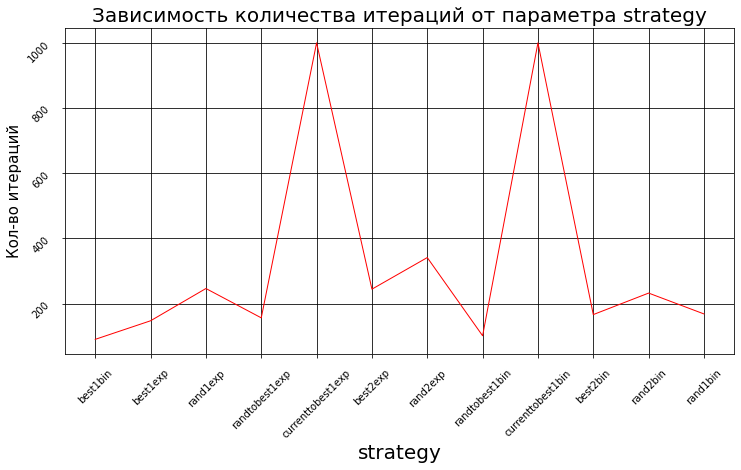

In [21]:
res  =  [] 
param  =  []
for i in ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp','rand2exp','randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']:
    res.append(differential_evolution(ackley,  bounds,  strategy=i,  seed=42 )['nit']) 
    param.append(i)
    
fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра strategy', size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('strategy', size = 20) 
plt.show()

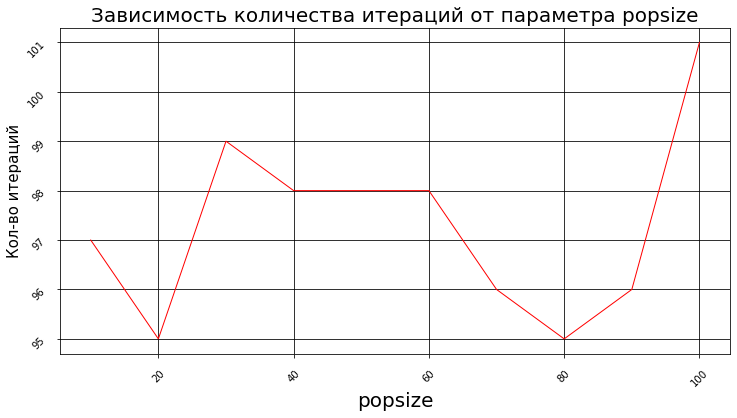

In [54]:
res_p = []
size = []
for i in range(10, 101, 10):
    res_p.append(differential_evolution(ackley,  bounds,  popsize=i,  seed=42 )['nit'])
    size.append(i)
        
fig, ax = plt.subplots()
ax.plot(size,  res_p, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра popsize', size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('popsize', size = 20) 
plt.show()

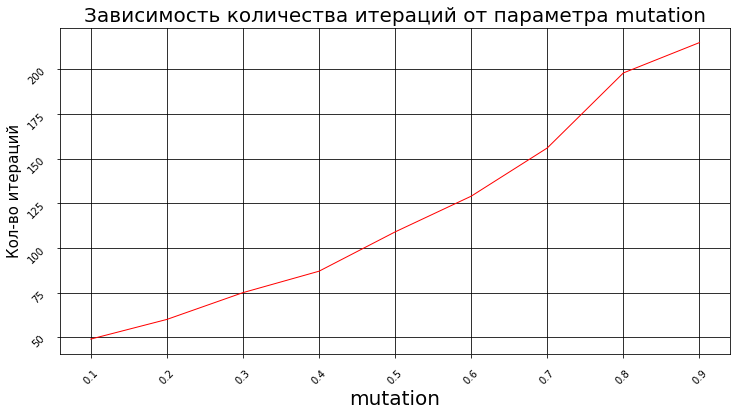

In [62]:
mut_param = []
res_m = []
for i in [[0.1, 0.8], [0.2, 0.9], [0.3, 1.], [0.4, 1.1], [0.5, 1.2], [0.6, 1.3], [0.7, 1.4], [0.8, 1.5], [0.9, 1.6]]:
    res_m.append(differential_evolution(ackley,  bounds,  mutation=i,  seed=42 )['nit'])
    mut_param.append(i[0])
    
fig, ax = plt.subplots()
ax.plot(mut_param,  res_m, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра mutation', size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('mutation', size = 20) 
plt.show()

## Дополнительное задание
Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [26]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [42]:
res2 = []
param2 = []

param_m = [
    'Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 
    'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP', 'trust-constr',
    'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov'
]

In [43]:
for i in param_m:
    try:
        res2.append(minimize(ackley, x0, method=i)['nit'])
        param2.append(i)
    except (ValueError, KeyError):
        pass

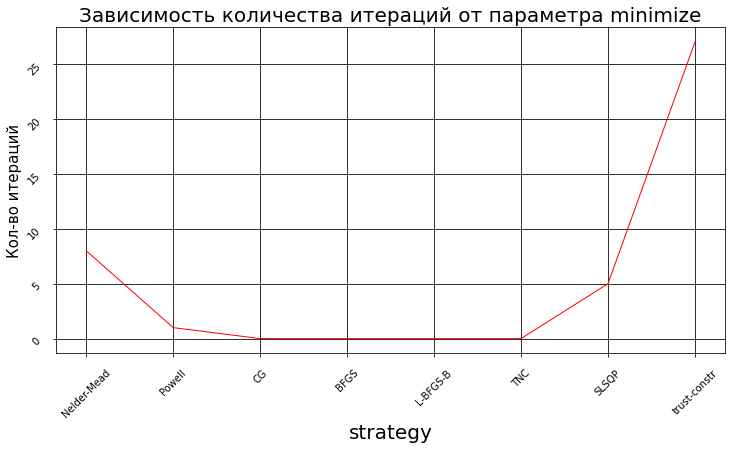

In [45]:
fig2, ax2 = plt.subplots()
ax2.plot(param2,  res2, color = 'r', linewidth = 1)
ax2.grid(which='major', color = 'k')
ax2.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig2.set_figwidth(12)
fig2.set_figheight(6)

plt.title('Зависимость количества итераций от параметра minimize', size=20)
plt.ylabel('Кол-во итераций', size = 15) 
plt.xlabel('strategy', size = 20) 
plt.show()